<a href="https://colab.research.google.com/github/Shin-ds/kaggle-datasets/blob/TAB_Kaggle_playground-series-_2504/ver1.1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/003.分析用データ/TAB_Kaggle_playground-series-_2504/train.csv')
train.head(3)

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.8,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.9,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531


In [ ]:
test = pd.read_csv('/content/drive/MyDrive/003.分析用データ/TAB_Kaggle_playground-series-_2504/test.csv')
test.head(3)

,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,750000,Educational Nuggets,Episode 73,78.96,Education,38.11,Saturday,Evening,53.33,1.0,Neutral
1,750001,Sound Waves,Episode 23,27.87,Music,71.29,Sunday,Morning,NaN,0.0,Neutral
2,750002,Joke Junction,Episode 11,69.10,Comedy,67.89,Friday,Evening,97.51,0.0,Positive


# カラム一覧
- Podcast_Name：ポッドキャストの名前
- Episode_Title：エピソードのタイトル
- Episode_Length：エピソードの長さ（分）
- Genre：エピソードのジャンル
- Host_Popularity_percentage：ホストの人気度スコア（0〜100）
- Publication_Day：エピソードの公開曜日
- Publication_Time：エピソードの公開時間帯（Morning など）
- Guest_Popularity_percentage：ゲストの人気度スコア（0〜100、該当する場合）
- Number_of_Ads：エピソード内の広告の数
- Episode_Sentiment：エピソードの感情（Positive / Neutral / Negative）
- Listening_Time_minutes：平均聴取時間（ターゲット変数）

In [ ]:
train.shape, test.shape

((750000, 12), (250000, 11))

In [ ]:
print(train.info())
print('***********************************')
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       662907 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  603970 non-null  float64
 9   Number_of_Ads                749999 non-null  float64
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-null  float64
dtypes: float64(5), int64(1), object(6)
memory usage: 68.7+ MB


In [ ]:
numeric_cols = train.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = train.select_dtypes(include=['object']).columns

In [ ]:
train[numeric_cols].describe()

,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,750000.000000,662907.000000,750000.000000,603970.000000,749999.000000,750000.000000
mean,374999.500000,64.504738,59.859901,52.236449,1.348855,45.437406
std,216506.495284,32.969603,22.873098,28.451241,1.151130,27.138306
min,0.000000,0.000000,1.300000,0.000000,0.000000,0.000000
25%,187499.750000,35.730000,39.410000,28.380000,0.000000,23.178350
50%,374999.500000,63.840000,60.050000,53.580000,1.000000,43.379460
75%,562499.250000,94.070000,79.530000,76.600000,2.000000,64.811580
max,749999.000000,325.240000,119.460000,119.910000,103.910000,119.970000


In [ ]:
train[categorical_cols].describe()

,Podcast_Name,Episode_Title,Genre,Publication_Day,Publication_Time,Episode_Sentiment
count,750000,750000,750000,750000,750000,750000
unique,48,100,10,7,4,3
top,Tech Talks,Episode 71,Sports,Sunday,Night,Neutral
freq,22847,10515,87606,115946,196849,251291


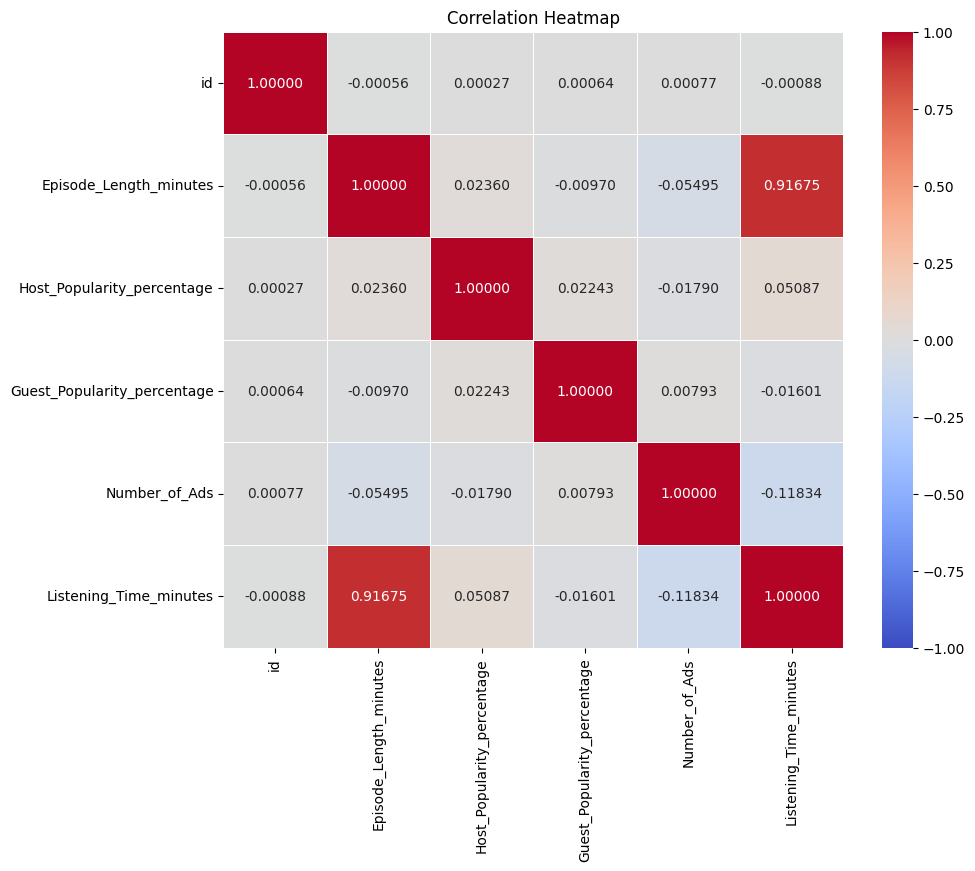

In [ ]:
corr = train.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, linewidths=0.5, cmap='coolwarm', fmt='.5f', vmin=-1)
plt.title('Correlation Heatmap')
plt.show()

# Podcast_Name

In [ ]:
train['Podcast_Name'].value_counts()

,count
Podcast_Name,
Tech Talks,22847
Sports Weekly,20053
Funny Folks,19635
Tech Trends,19549
Fitness First,19488
Business Insights,19480
Style Guide,19364
Game Day,19272
Melody Mix,18889


<Axes: xlabel='Podcast_Name'>

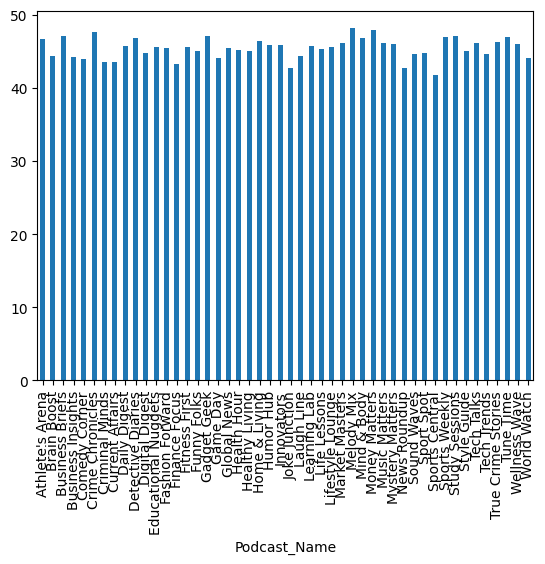

In [ ]:
train.groupby('Podcast_Name')['Listening_Time_minutes'].mean().plot(kind='bar')

### Episode_Length_minutes

<Axes: >

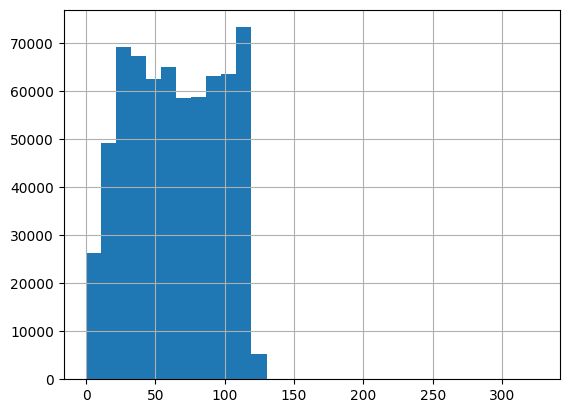

In [ ]:
train['Episode_Length_minutes'].hist(bins=30)

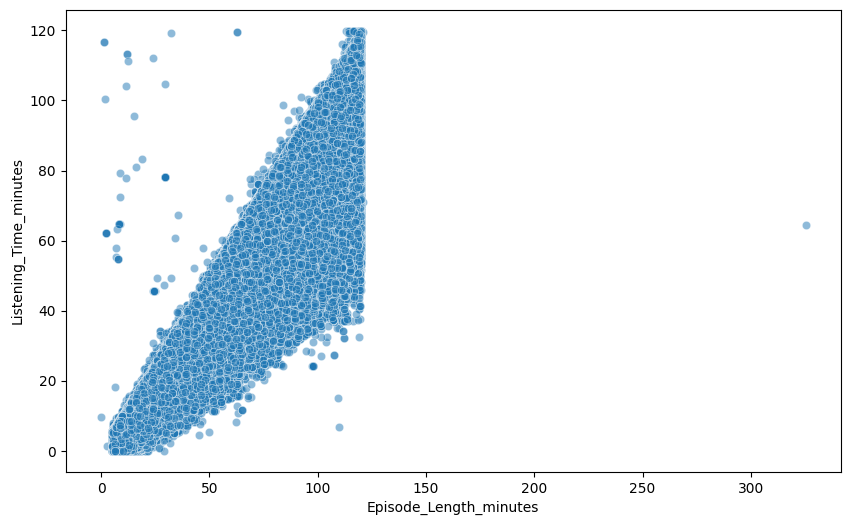

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train, x='Episode_Length_minutes', y='Listening_Time_minutes', alpha=0.5)
plt.show()

### Genre

In [ ]:
train['Genre'].value_counts()

,count
Genre,
Sports,87606
Technology,86256
True Crime,85059
Lifestyle,82461
Comedy,81453
Business,80521
Health,71416
News,63385
Music,62743


<Axes: xlabel='Genre'>

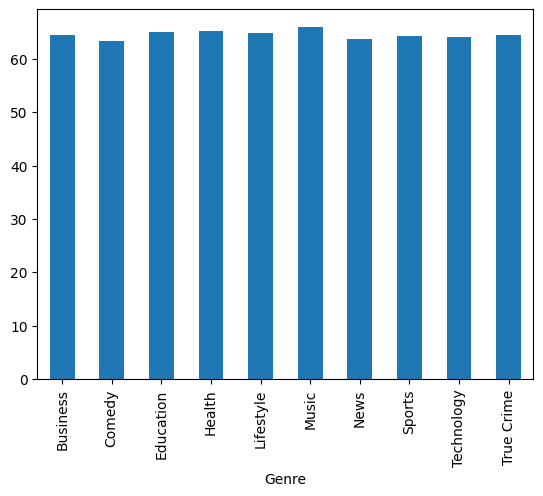

In [ ]:
train.groupby('Genre')['Episode_Length_minutes'].mean().plot(kind='bar')

### Host_Popularity_percentage

<Axes: >

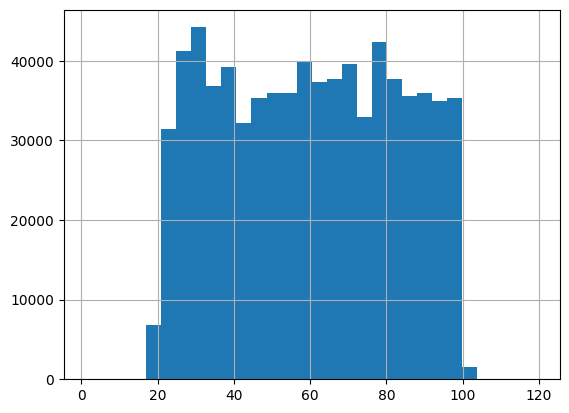

In [ ]:
train['Host_Popularity_percentage'].hist(bins=30)

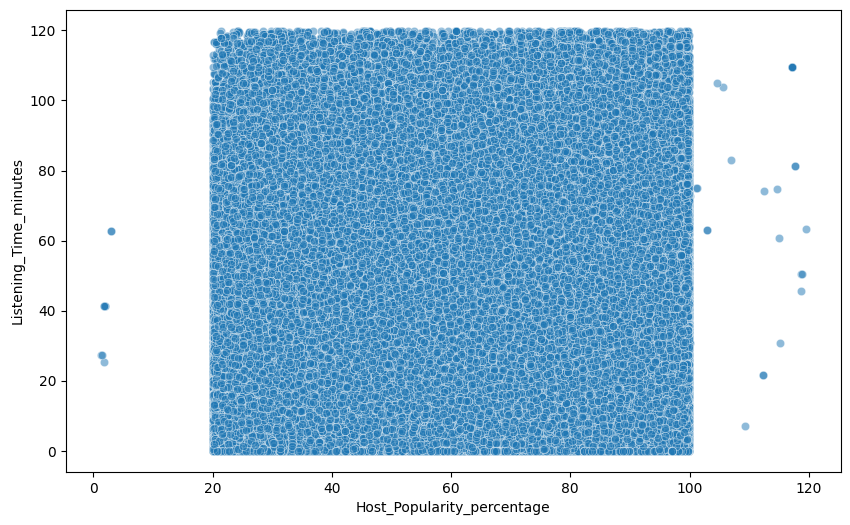

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train, x='Host_Popularity_percentage', y='Listening_Time_minutes', alpha=0.5)
plt.show()

### Publication_Day

In [ ]:
train['Publication_Day'].value_counts()

,count
Publication_Day,
Sunday,115946
Monday,111963
Friday,108237
Wednesday,107886
Thursday,104360
Saturday,103505
Tuesday,98103


<Axes: xlabel='Publication_Day'>

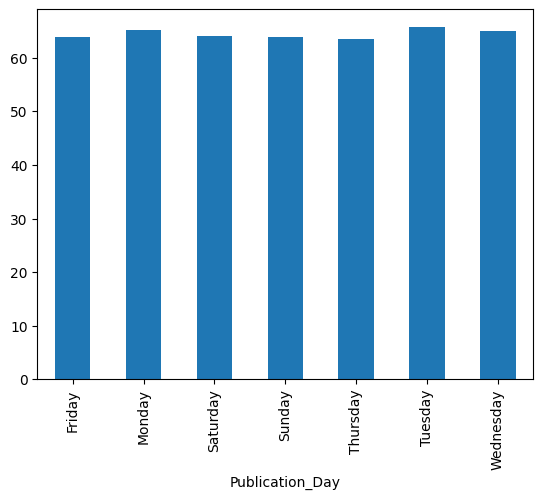

In [ ]:
train.groupby('Publication_Day')['Episode_Length_minutes'].mean().plot(kind='bar')

### Publication_Time

In [ ]:
train['Publication_Time'].value_counts()

,count
Publication_Time,
Night,196849
Evening,195778
Afternoon,179460
Morning,177913


<Axes: xlabel='Publication_Time'>

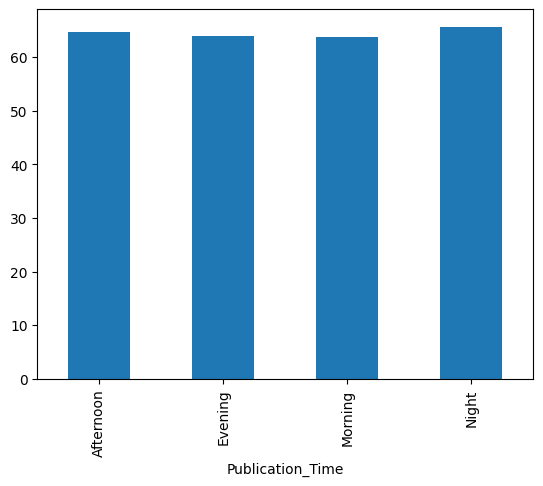

In [ ]:
train.groupby('Publication_Time')['Episode_Length_minutes'].mean().plot(kind='bar')

### Guest_Popularity_percentage

<Axes: >

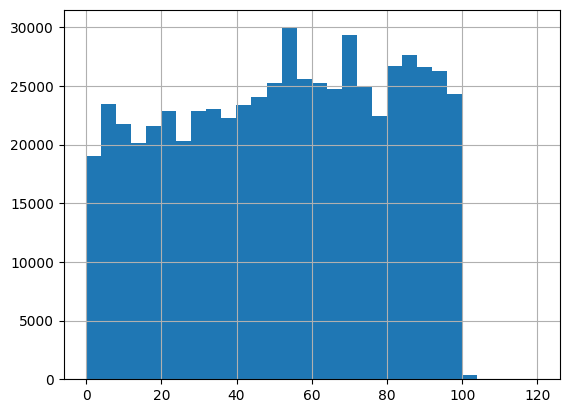

In [ ]:
train['Guest_Popularity_percentage'].hist(bins=30)

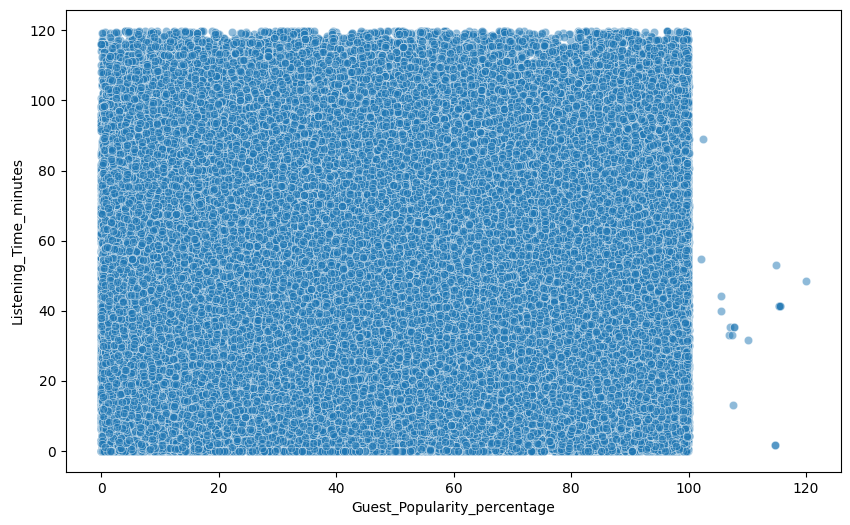

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train, x='Guest_Popularity_percentage', y='Listening_Time_minutes', alpha=0.5)
plt.show()

### Number_of_Ads

In [ ]:
train['Number_of_Ads'].value_counts()

,count
Number_of_Ads,
0.00,217592
1.00,214069
3.00,160173
2.00,158156
103.25,2
53.37,1
103.00,1
103.91,1
53.42,1


<Axes: xlabel='Number_of_Ads'>

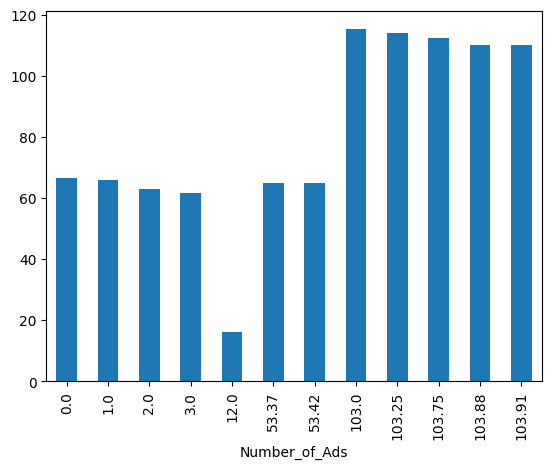

In [ ]:
train.groupby('Number_of_Ads')['Episode_Length_minutes'].mean().plot(kind='bar')

### Episode_Sentiment

In [ ]:
train['Episode_Sentiment'].value_counts()

,count
Episode_Sentiment,
Neutral,251291
Negative,250116
Positive,248593


<Axes: xlabel='Episode_Sentiment'>

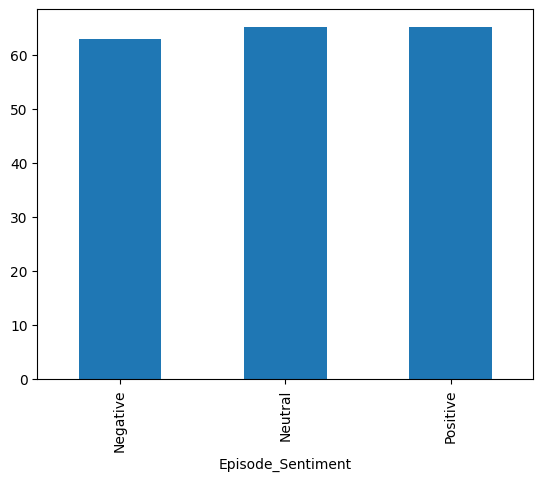

In [ ]:
train.groupby('Episode_Sentiment')['Episode_Length_minutes'].mean().plot(kind='bar')

# データの前処理・モデル構築


In [ ]:
X = train.drop(['id', 'Podcast_Name', 'Episode_Title', 'Listening_Time_minutes'], axis=1)
y = train['Listening_Time_minutes']
test_id = test['id']
df = X
X.head(3)

,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment
0,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive
1,119.8,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative
2,73.9,Education,69.97,Tuesday,Evening,8.97,0.0,Negative


In [ ]:
categorical_features = [i for i in X.columns if X[i].dtype == 'object']
numerical_features = [i for i in X.columns if X[i].dtype in ['int64', 'float64']]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((525000, 8), (225000, 8), (525000,), (225000,))

In [ ]:
numerical_transformer = Pipeline([('imputer', SimpleImputer(strategy='median')),
                                ('scaler', StandardScaler())])

categorical_transformer = Pipeline([('onehot', OneHotEncoder(handle_unknown='ignore', drop='first'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('car', categorical_transformer, categorical_features)
    ]
)

In [ ]:
pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor',    LinearRegression())
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
print('Test score: ', pipe.score(X_test, y_test))

Test score:  0.7573229886444841


In [ ]:
prediction = pipe.predict(test.drop(['id', 'Podcast_Name', 'Episode_Title'], axis=1))
prediction

array([55.83398617, 20.20017955, 51.60394654, ...,  4.34533911,
       79.72728473, 57.20296986])

In [ ]:
pred_id = test['id']
prediction_df = pd.DataFrame(prediction, columns=['Listening_Time_minutes'])
prediction_df = pd.concat([pred_id, prediction_df], axis=1)
prediction_df

,id,Listening_Time_minutes
0,750000,55.833986
1,750001,20.200180
2,750002,51.603947
3,750003,81.669201
4,750004,49.995529
...,...,...
249995,999995,9.176341
249996,999996,59.433325
249997,999997,4.345339
249998,999998,79.727285


In [ ]:
prediction_df.to_csv('/content/drive/MyDrive/003.分析用データ/TAB_Kaggle_playground-series-_2504/submission.csv', index=False)